In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Project_B_Export_SM.xlsx")
df

Date Project    Machine Table Part No.     Batch  \
0     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
1     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
2     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
3     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
4     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
...                  ...     ...        ...   ...      ...       ...   
3856  17.6.2020 11:17:35       B  Remote 17    S2      C53  17.6.N17   
3857   18.6.2020 7:54:41       B  Remote 17    S2      C53  18.6.N17   
3858  19.6.2020 20:23:45       B  Remote 17    S2      C53  19.6.N17   
3859  22.6.2020 11:11:35       B  Remote 17    S2      C53  22.6.N17   
3860  23.6.2020 10:21:24       B  Remote 17    S2      C53  23.6.N17   

      Weld no. Result   Sn_1    z_1  
0            1     OK  1.247  1.633  
1            2     OK  1.147  1.213  
2            3     OK  1.048  1.489  
3            4     OK  1.644  1.015  
4            5     OK  1.169  1.533  
...        ...    ...    ...    ...  
3856         1     OK  1.016  1.766  
3857         1     OK  1.227  1.439  
3858         1     OK  1.205  1.362  
3859         1     OK  1.012  1.752  
3860         1     OK  1.012  1.739  

[3861 rows x 10 columns]

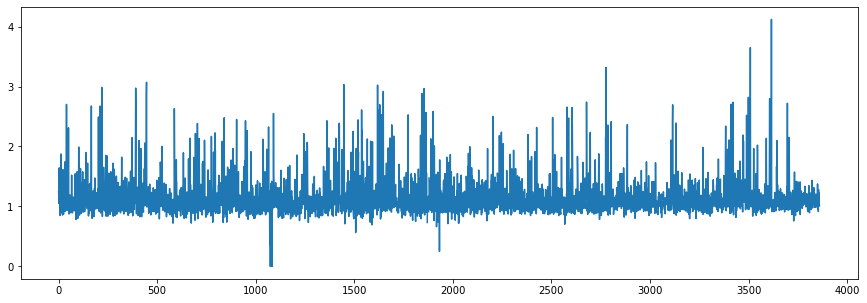

In [8]:
df["Sn_1"].plot(figsize=(15,5))

In [26]:
df["Sn_1"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3856    False
3857    False
3858    False
3859    False
3860    False
Name: Sn_1, Length: 3727, dtype: bool

In [13]:
df[df["Sn_1"].isnull()]

Date Project    Machine Table Part No.     Batch  \
1869  19.5.2020 10:55:23       B  Remote 15    S2      C54  19.5.R15   
1872  19.5.2020 10:55:23       B  Remote 15    S2      C54  19.5.R15   
1878  19.5.2020 10:55:23       B  Remote 15    S2      C65  19.5.R15   
1881  19.5.2020 10:55:23       B  Remote 15    S2      C65  19.5.R15   

      Weld no. Result  Sn_1  z_1  
1869         3    NOK   NaN  NaN  
1872         6    NOK   NaN  NaN  
1878         3    NOK   NaN  NaN  
1881         6    NOK   NaN  NaN

In [15]:
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd898bef9d0>,
      dtype=object)

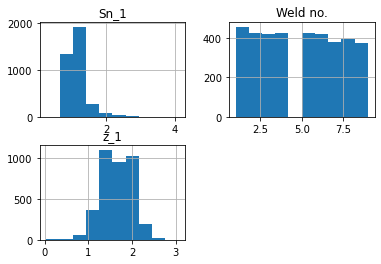

In [18]:
df.hist()

In [19]:
from scipy import stats

In [24]:
pd.Series(stats.zscore(df["Sn_1"])).plot()

In [27]:
df[stats.zscore(df["Sn_1"]) < 3]

Date Project    Machine Table Part No.     Batch  \
0     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
1     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
2     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
3     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
4     26.2.2020 17:45:58       B  Remote 13    S1      C53  24.2.N13   
...                  ...     ...        ...   ...      ...       ...   
3856  17.6.2020 11:17:35       B  Remote 17    S2      C53  17.6.N17   
3857   18.6.2020 7:54:41       B  Remote 17    S2      C53  18.6.N17   
3858  19.6.2020 20:23:45       B  Remote 17    S2      C53  19.6.N17   
3859  22.6.2020 11:11:35       B  Remote 17    S2      C53  22.6.N17   
3860  23.6.2020 10:21:24       B  Remote 17    S2      C53  23.6.N17   

      Weld no. Result   Sn_1    z_1  
0            1     OK  1.247  1.633  
1            2     OK  1.147  1.213  
2            3     OK  1.048  1.489  
3            4     OK  1.644  1.015  
4            5     OK  1.169  1.533  
...        ...    ...    ...    ...  
3856         1     OK  1.016  1.766  
3857         1     OK  1.227  1.439  
3858         1     OK  1.205  1.362  
3859         1     OK  1.012  1.752  
3860         1     OK  1.012  1.739  

[3625 rows x 10 columns]

In [28]:
A = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]])
A

0  1  2
0  1  2  3
1  4  5  6
2  7  8  9

In [30]:
A[ [True, False, True]  ]

0  1  2
0  1  2  3
2  7  8  9

In [33]:
df["Part No."] == "C53"

0       True
1       True
2       True
3       True
4       True
        ... 
3856    True
3857    True
3858    True
3859    True
3860    True
Name: Part No., Length: 3727, dtype: bool

In [36]:
df_c53 = df[df["Part No."] == "C53"]
df_c53[["Sn_1", "z_1"]].plot.kde()

In [38]:
df_c53.plot.scatter(x="Sn_1", y="z_1")

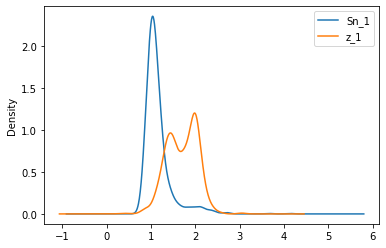

In [40]:
df_c64 = df[df["Part No."] == "C64"]
df_c64[["Sn_1", "z_1"]].plot.kde()

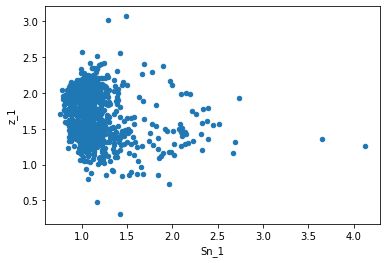

In [41]:
df_c53.plot.scatter(x="Sn_1", y="z_1")

In [54]:
dfl = df.set_index(["Part No.", "Weld no."])
dfl

Date Project    Machine Table     Batch  \
Part No. Weld no.                                                          
C53      1         26.2.2020 17:45:58       B  Remote 13    S1  24.2.N13   
         2         26.2.2020 17:45:58       B  Remote 13    S1  24.2.N13   
         3         26.2.2020 17:45:58       B  Remote 13    S1  24.2.N13   
         4         26.2.2020 17:45:58       B  Remote 13    S1  24.2.N13   
         5         26.2.2020 17:45:58       B  Remote 13    S1  24.2.N13   
...                               ...     ...        ...   ...       ...   
         1         17.6.2020 11:17:35       B  Remote 17    S2  17.6.N17   
         1          18.6.2020 7:54:41       B  Remote 17    S2  18.6.N17   
         1         19.6.2020 20:23:45       B  Remote 17    S2  19.6.N17   
         1         22.6.2020 11:11:35       B  Remote 17    S2  22.6.N17   
         1         23.6.2020 10:21:24       B  Remote 17    S2  23.6.N17   

                  Result   Sn_1    z_1  
Part No. Weld no.                       
C53      1            OK  1.247  1.633  
         2            OK  1.147  1.213  
         3            OK  1.048  1.489  
         4            OK  1.644  1.015  
         5            OK  1.169  1.533  
...                  ...    ...    ...  
         1            OK  1.016  1.766  
         1            OK  1.227  1.439  
         1            OK  1.205  1.362  
         1            OK  1.012  1.752  
         1            OK  1.012  1.739  

[3727 rows x 8 columns]

In [55]:
dfl.loc[("C53", 1)].plot.scatter(x="Sn_1", y="z_1")

<ipython-input-55-fa2085faa4b3>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  dfl.loc[("C53", 1)].plot.scatter(x="Sn_1", y="z_1")


In [48]:
dfl.loc[("Remote 17", "S1", "")].plot.scatter(x="Sn_1", y="z_1")

In [56]:
from scipy.stats import ttest_ind

In [58]:
ttest_ind(dfl["Sn_1"], df["z_1"])

Ttest_indResult(statistic=-64.4586704776066, pvalue=0.0)

In [63]:
df_c53_1 = dfl.loc[("C53", 1)]

<ipython-input-63-0a7365fc5dd6>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_c53_1 = dfl.loc[("C53", 1)]


In [64]:
len(df_c53_1)

129

In [65]:
ttest_ind(df_c53_1["Sn_1"], df_c53_1["z_1"])

Ttest_indResult(statistic=-30.392665507273012, pvalue=6.566568458170777e-87)

In [70]:
df_c53_1.plot.scatter(x="Sn_1", y="z_1")

In [67]:
df_c53_1

Date Project    Machine Table     Batch  \
Part No. Weld no.                                                          
C53      1         26.2.2020 17:45:58       B  Remote 13    S1  24.2.N13   
         1           2.3.2020 9:09:44       B  Remote 13    S1   2.3.N13   
         1           4.3.2020 9:52:31       B  Remote 13    S1   3.3.N13   
         1           5.3.2020 8:54:00       B  Remote 13    S1   5.3.N13   
         1         10.3.2020 17:40:45       B  Remote 13    S1  10.3.N13   
...                               ...     ...        ...   ...       ...   
         1         17.6.2020 11:17:35       B  Remote 17    S2  17.6.N17   
         1          18.6.2020 7:54:41       B  Remote 17    S2  18.6.N17   
         1         19.6.2020 20:23:45       B  Remote 17    S2  19.6.N17   
         1         22.6.2020 11:11:35       B  Remote 17    S2  22.6.N17   
         1         23.6.2020 10:21:24       B  Remote 17    S2  23.6.N17   

                  Result   Sn_1    z_1  
Part No. Weld no.                       
C53      1            OK  1.247  1.633  
         1            OK  1.014  1.915  
         1            OK  1.004  1.831  
         1            OK  1.004  1.677  
         1            OK  1.293  1.249  
...                  ...    ...    ...  
         1            OK  1.016  1.766  
         1            OK  1.227  1.439  
         1            OK  1.205  1.362  
         1            OK  1.012  1.752  
         1            OK  1.012  1.739  

[129 rows x 8 columns]

In [71]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [72]:
import seaborn as sns

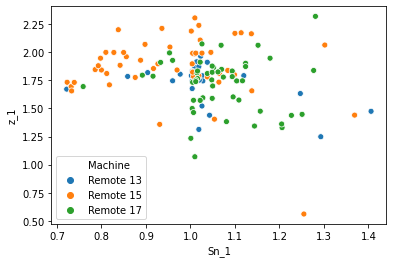

In [73]:
sns.scatterplot(data=df_c53_1, x="Sn_1", y="z_1", hue="Machine")

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# some random data
x = df_c53_1["Sn_1"]
y = df_c53_1["z_1"]

In [80]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

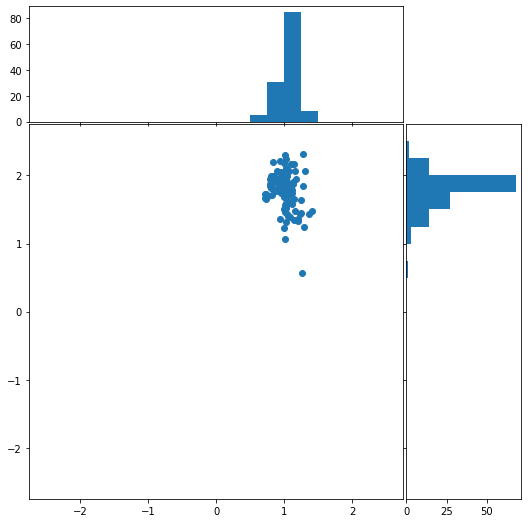

In [81]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()